In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [373]:
train = pd.read_csv('C:\\Users\\HP\\Desktop\\rapa\\fifa_data\\FIFA_train.csv', encoding='utf-8')
test = pd.read_csv('C:\\Users\\HP\\Desktop\\rapa\\fifa_data\\FIFA_test.csv', encoding='utf-8')
# 데이터 불러오기

In [374]:
train.drop(['id','name'], axis=1, inplace=True)
test.drop(['id','name'], axis=1, inplace=True)

In [375]:
train.contract_until.value_counts() # 계약기간 값들 정렬

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [376]:
# 계약기간값 년도별로 재구성

def func(string:object) -> int:
    string = string[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

### EDA

In [394]:
b_train = train.copy()

In [395]:
b_test = test.copy()

In [396]:
b_train.shape, b_test.shape

((8932, 10), (3828, 9))

In [397]:
b_train['continent']=b_train['continent'].astype('category').cat.codes
b_test['continent'] = b_test['continent'].astype('category').cat.codes

b_train['position'] = b_train['position'].astype('category').cat.codes
b_test['position'] = b_test['position'].astype('category').cat.codes

b_train['prefer_foot'] = b_train['prefer_foot'].astype('category').cat.codes
b_test['prefer_foot'] = b_test['prefer_foot'].astype('category').cat.codes

In [398]:
b_train

age  continent  contract_until  position  prefer_foot  reputation  \
0      31          4            2021         3            0         5.0   
1      27          2            2020         1            1         4.0   
2      31          4            2021         3            1         5.0   
3      32          2            2020         0            1         4.0   
4      25          2            2021         1            1         3.0   
...   ...        ...             ...       ...          ...         ...   
8927   18          0            2019         2            1         1.0   
8928   19          2            2020         0            1         1.0   
8929   18          4            2021         0            1         1.0   
8930   18          2            2021         1            1         1.0   
8931   19          2            2020         3            1         1.0   

      stat_overall  stat_potential  stat_skill_moves        value  
0               94              94               4.0  110500000.0  
1               91              93               1.0   72000000.0  
2               91              91               3.0   80000000.0  
3               91              91               3.0   51000000.0  
4               90              93               1.0   68000000.0  
...            ...             ...               ...          ...  
8927            48              63               3.0      60000.0  
8928            47              59               2.0      40000.0  
8929            47              64               2.0      50000.0  
8930            47              65               1.0      50000.0  
8931            47              63               2.0      60000.0  

[8932 rows x 10 columns]

In [399]:
train.info(), test.info()

from sklearn.model_selection import train_test_split
X = b_train.drop(['value'],axis=1)
y = b_train['value']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 697.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3828 non-null   int64  
 1   continent    

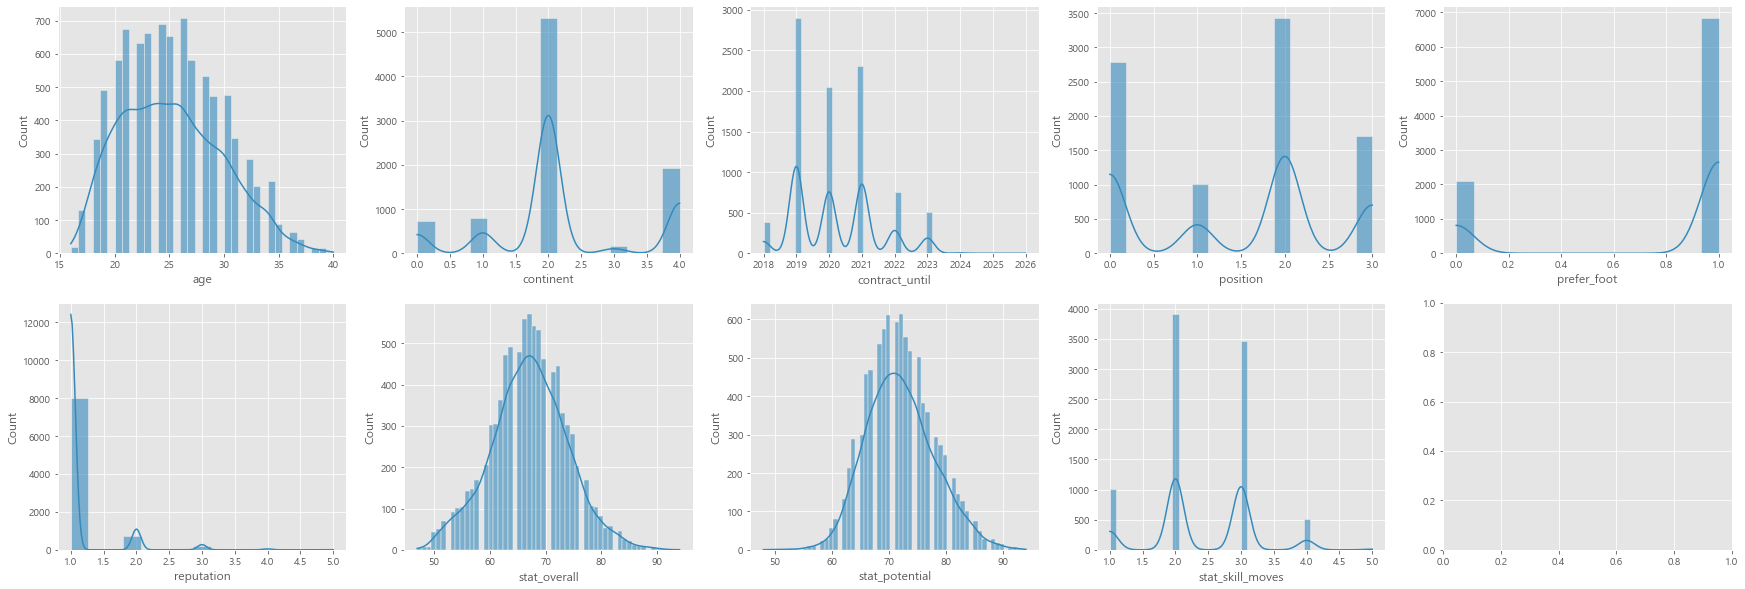

In [400]:
f, axes = plt.subplots(2,5, figsize=(30,10)) # 변수가 10개 이므로 subplots을 (2,5) 로 설정해주었습니다.
axes = axes.flatten()
for col,ax in zip(X.columns, axes):
    sns.histplot(data = X, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

In [401]:
X = train['reputation'].values
X = X.reshape(-1,1)
X.shape

(8932, 1)

In [402]:
y = train['value'].values
y = y.reshape(-1,1)
y.shape

(8932, 1)

In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 1), (1787, 1), (7145, 1), (1787, 1))

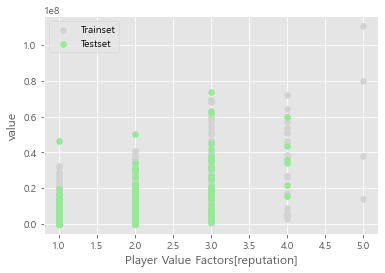

In [404]:
def draw_data():
  plt.scatter(X_train, y_train, label='Trainset', color='lightgray')
  plt.scatter(X_test, y_test, label='Testset', color='lightgreen')
  plt.xlabel('Player Value Factors[reputation]')
  plt.ylabel('value')
  plt.legend()
draw_data()

In [405]:
X = train['stat_overall'].values
X = X.reshape(-1,1)
X.shape

(8932, 1)

In [406]:
y = train['value'].values
y = y.reshape(-1,1)
y.shape

(8932, 1)

In [407]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 1), (1787, 1), (7145, 1), (1787, 1))

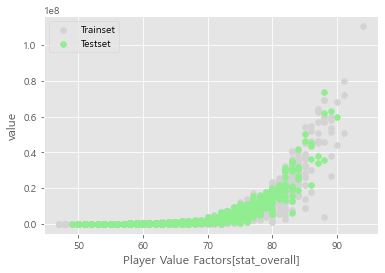

In [408]:
def draw_data():
    plt.scatter(X_train, y_train, label='Trainset', color='lightgray')
    plt.scatter(X_test, y_test, label='Testset', color='lightgreen')
    plt.xlabel('Player Value Factors[stat_overall]')
    plt.ylabel('value')
    plt.legend()
draw_data()

In [431]:
b_train["log_value"] = np.log(b_train['value'])
log_value = b_train["log_value"]

In [436]:
# 연봉 로그값의 분포도 그래프
sns.histplot(log_value)

<AxesSubplot:xlabel='log_value', ylabel='Count'>

<AxesSubplot:xlabel='age', ylabel='value'>

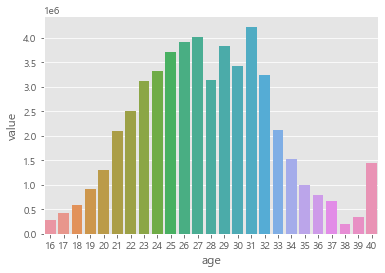

In [440]:
# 나이대별 평균 연봉 (로그값)
age_value_mean = b_train.groupby("age")["value"].mean()
age_value_mean = age_value_mean.reset_index()

sns.barplot(x="age",y="value",data=age_value_mean)

In [442]:
# 나이대별 평균 연봉 (로그값)
age_value_mean = b_train.groupby("age")["log_value"].mean()
age_value_mean = age_value_mean.reset_index()

sns.barplot(x="age",y="log_value",data=age_value_mean)

<AxesSubplot:xlabel='age', ylabel='log_value'>

<AxesSubplot:xlabel='age', ylabel='reputation'>

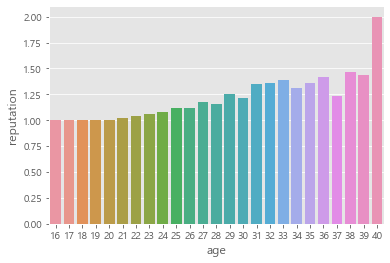

In [444]:
# 나이대별 평균 인기도
age_value_mean = b_train.groupby("age")["reputation"].mean()
age_value_mean = age_value_mean.reset_index()

sns.barplot(x="age",y="reputation",data=age_value_mean)

<AxesSubplot:xlabel='prefer_foot', ylabel='value'>

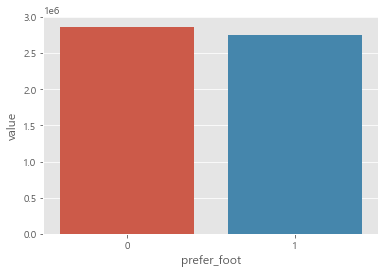

In [450]:
# 왼발0 오른발1 사용 발별 연봉 
age_value_mean = b_train.groupby("prefer_foot")["value"].mean()
age_value_mean = age_value_mean.reset_index()

sns.barplot(x="prefer_foot",y="value",data=age_value_mean)

In [455]:
b_train

age  continent  contract_until  position  prefer_foot  reputation  \
0      31          4            2021         3            0         5.0   
1      27          2            2020         1            1         4.0   
2      31          4            2021         3            1         5.0   
3      32          2            2020         0            1         4.0   
4      25          2            2021         1            1         3.0   
...   ...        ...             ...       ...          ...         ...   
8927   18          0            2019         2            1         1.0   
8928   19          2            2020         0            1         1.0   
8929   18          4            2021         0            1         1.0   
8930   18          2            2021         1            1         1.0   
8931   19          2            2020         3            1         1.0   

      stat_overall  stat_potential  stat_skill_moves        value  log_value  
0               94              94               4.0  110500000.0  18.520526  
1               91              93               1.0   72000000.0  18.092177  
2               91              91               3.0   80000000.0  18.197537  
3               91              91               3.0   51000000.0  17.747336  
4               90              93               1.0   68000000.0  18.035018  
...            ...             ...               ...          ...        ...  
8927            48              63               3.0      60000.0  11.002100  
8928            47              59               2.0      40000.0  10.596635  
8929            47              64               2.0      50000.0  10.819778  
8930            47              65               1.0      50000.0  10.819778  
8931            47              63               2.0      60000.0  11.002100  

[8932 rows x 11 columns]

### LinearRegression 구현

In [412]:
lables= train['value']
lables

0       110500000.0
1        72000000.0
2        80000000.0
3        51000000.0
4        68000000.0
           ...     
8927        60000.0
8928        40000.0
8929        50000.0
8930        50000.0
8931        60000.0
Name: value, Length: 8932, dtype: float64

In [413]:
train.drop(['value'], axis=1, inplace=True)

In [414]:
# lables값 확인
lables

0       110500000.0
1        72000000.0
2        80000000.0
3        51000000.0
4        68000000.0
           ...     
8927        60000.0
8928        40000.0
8929        50000.0
8930        50000.0
8931        60000.0
Name: value, Length: 8932, dtype: float64

In [415]:
# 정렬확인
train

age      continent  contract_until position prefer_foot  reputation  \
0      31  south america            2021       ST        left         5.0   
1      27         europe            2020       GK       right         4.0   
2      31  south america            2021       ST       right         5.0   
3      32         europe            2020       DF       right         4.0   
4      25         europe            2021       GK       right         3.0   
...   ...            ...             ...      ...         ...         ...   
8927   18         africa            2019       MF       right         1.0   
8928   19         europe            2020       DF       right         1.0   
8929   18  south america            2021       DF       right         1.0   
8930   18         europe            2021       GK       right         1.0   
8931   19         europe            2020       ST       right         1.0   

      stat_overall  stat_potential  stat_skill_moves  
0               94              94               4.0  
1               91              93               1.0  
2               91              91               3.0  
3               91              91               3.0  
4               90              93               1.0  
...            ...             ...               ...  
8927            48              63               3.0  
8928            47              59               2.0  
8929            47              64               2.0  
8930            47              65               1.0  
8931            47              63               2.0  

[8932 rows x 9 columns]

In [416]:
# ojbect 타입 list변환후 출력
olist=train.dtypes[train.dtypes=='object'].index
olist = list(olist)
olist

['continent', 'position', 'prefer_foot']

In [417]:
# dummies로 변수창출 후 원변수 제거
for x in olist:
    train = pd.concat((train, pd.get_dummies(train[x])), axis=1)
    train.drop(x,axis=1,inplace=True)

In [418]:
# 데이터 확인
train

age  contract_until  reputation  stat_overall  stat_potential  \
0      31            2021         5.0            94              94   
1      27            2020         4.0            91              93   
2      31            2021         5.0            91              91   
3      32            2020         4.0            91              91   
4      25            2021         3.0            90              93   
...   ...             ...         ...           ...             ...   
8927   18            2019         1.0            48              63   
8928   19            2020         1.0            47              59   
8929   18            2021         1.0            47              64   
8930   18            2021         1.0            47              65   
8931   19            2020         1.0            47              63   

      stat_skill_moves  africa  asia  europe  oceania  south america  DF  GK  \
0                  4.0       0     0       0        0              1   0   0   
1                  1.0       0     0       1        0              0   0   1   
2                  3.0       0     0       0        0              1   0   0   
3                  3.0       0     0       1        0              0   1   0   
4                  1.0       0     0       1        0              0   0   1   
...                ...     ...   ...     ...      ...            ...  ..  ..   
8927               3.0       1     0       0        0              0   0   0   
8928               2.0       0     0       1        0              0   1   0   
8929               2.0       0     0       0        0              1   1   0   
8930               1.0       0     0       1        0              0   0   1   
8931               2.0       0     0       1        0              0   0   0   

      MF  ST  left  right  
0      0   1     1      0  
1      0   0     0      1  
2      0   1     0      1  
3      0   0     0      1  
4      0   0     0      1  
...   ..  ..   ...    ...  
8927   1   0     0      1  
8928   0   0     0      1  
8929   0   0     0      1  
8930   0   0     0      1  
8931   0   1     0      1  

[8932 rows x 17 columns]

In [419]:
# 초기 LinearRegression값

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


x_train,x_test,y_train,y_test = train_test_split(train, lables,
                                                 test_size=0.3,
                                                 random_state= 111)

model = LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [420]:
model.fit(x_train, y_train) 
model.coef_, model.intercept_

(array([-396839.71930919,  339558.52278459, 6448254.20818612,
         500812.85593073,  -48489.15296136,  127473.82362587,
        -282330.09408556,  236099.55819538, -149801.86606916,
         230464.00048857,  -34431.59852924, -424251.98331392,
         586198.10972106,  -58191.12357911, -103755.00282803,
         -19927.78388208,   19927.78388208]),
 -710706745.5923765)

In [421]:
# 스코어점수
model.score(x_test, y_test)

0.6216642307238236

In [422]:
y_test

987      5500000.0
1065     8500000.0
3846      270000.0
6703      550000.0
8438      180000.0
           ...    
191     12500000.0
4955      525000.0
641     12500000.0
5583      575000.0
7692      375000.0
Name: value, Length: 2680, dtype: float64

### 대륙분포 제거 버전

In [423]:
# 불필요해보이는 대륙분포를 제거
tss = train.drop(train.iloc[:,6:11],axis=1)

In [424]:
#대륙 제거한 train값 
tss

age  contract_until  reputation  stat_overall  stat_potential  \
0      31            2021         5.0            94              94   
1      27            2020         4.0            91              93   
2      31            2021         5.0            91              91   
3      32            2020         4.0            91              91   
4      25            2021         3.0            90              93   
...   ...             ...         ...           ...             ...   
8927   18            2019         1.0            48              63   
8928   19            2020         1.0            47              59   
8929   18            2021         1.0            47              64   
8930   18            2021         1.0            47              65   
8931   19            2020         1.0            47              63   

      stat_skill_moves  DF  GK  MF  ST  left  right  
0                  4.0   0   0   0   1     1      0  
1                  1.0   0   1   0   0     0      1  
2                  3.0   0   0   0   1     0      1  
3                  3.0   1   0   0   0     0      1  
4                  1.0   0   1   0   0     0      1  
...                ...  ..  ..  ..  ..   ...    ...  
8927               3.0   0   0   1   0     0      1  
8928               2.0   1   0   0   0     0      1  
8929               2.0   1   0   0   0     0      1  
8930               1.0   0   1   0   0     0      1  
8931               2.0   0   0   0   1     0      1  

[8932 rows x 12 columns]

In [425]:
x_train,x_test,y_train,y_test = train_test_split(tss, lables,
                                                 test_size=0.3,
                                                 random_state= 111)

model = LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [426]:
model.fit(x_train, y_train) 
model.coef_, model.intercept_

(array([-393739.11873111,  351376.7040645 , 6454357.60725952,
         497223.95940886,  -49922.38799482,  135650.55892296,
        -422236.51280548,  592597.83964969,  -57687.10665778,
        -112674.22018643,  -18857.97593399,   18857.97593399]),
 -734436262.2502766)

In [427]:
model.score(x_test, y_test)

0.6205464373371865

In [452]:
y_test

987      5500000.0
1065     8500000.0
3846      270000.0
6703      550000.0
8438      180000.0
           ...    
191     12500000.0
4955      525000.0
641     12500000.0
5583      575000.0
7692      375000.0
Name: value, Length: 2680, dtype: float64

### OLS

In [454]:
import statsmodels.api as sm
x2= sm.add_constant(x_test)

model_sm1 = sm.OLS(y_test, x2)
result1= model_sm1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     443.2
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:58:35   Log-Likelihood:                -44157.
No. Observations:                2680   AIC:                         8.834e+04
Df Residuals:                    2669   BIC:                         8.840e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.311e+08   6.42e+07  

### stat_skill_moves  제거버전

In [457]:
train.drop(['stat_skill_moves'], axis=1, inplace=True)

In [458]:
train

age  contract_until  reputation  stat_overall  stat_potential  africa  \
0      31            2021         5.0            94              94       0   
1      27            2020         4.0            91              93       0   
2      31            2021         5.0            91              91       0   
3      32            2020         4.0            91              91       0   
4      25            2021         3.0            90              93       0   
...   ...             ...         ...           ...             ...     ...   
8927   18            2019         1.0            48              63       1   
8928   19            2020         1.0            47              59       0   
8929   18            2021         1.0            47              64       0   
8930   18            2021         1.0            47              65       0   
8931   19            2020         1.0            47              63       0   

      asia  europe  oceania  south america  DF  GK  MF  ST  left  right  
0        0       0        0              1   0   0   0   1     1      0  
1        0       1        0              0   0   1   0   0     0      1  
2        0       0        0              1   0   0   0   1     0      1  
3        0       1        0              0   1   0   0   0     0      1  
4        0       1        0              0   0   1   0   0     0      1  
...    ...     ...      ...            ...  ..  ..  ..  ..   ...    ...  
8927     0       0        0              0   0   0   1   0     0      1  
8928     0       1        0              0   1   0   0   0     0      1  
8929     0       0        0              1   1   0   0   0     0      1  
8930     0       1        0              0   0   1   0   0     0      1  
8931     0       1        0              0   0   0   0   1     0      1  

[8932 rows x 16 columns]

In [463]:
x_train,x_test,y_train,y_test = train_test_split(train, lables,
                                                 test_size=0.3,
                                                 random_state= 111)

model = LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [464]:
model.fit(x_train, y_train) 
model.coef_, model.intercept_

(array([-399602.53428202,  338213.74910884, 6449754.37300889,
         506877.17801725,  -49051.58425121, -282460.94768884,
         239716.15904808, -154630.5609598 ,  236413.04003482,
         -39037.69043426, -422713.88011388,  445650.52992569,
           9193.5663064 ,  -32130.21611822,  -13318.65898206,
          13318.65898205]),
 -707999245.1019058)

In [465]:
model.score(x_test, y_test)

0.6218116628896939

In [466]:
import statsmodels.api as sm
x2= sm.add_constant(x_test)

model_sm1 = sm.OLS(y_test, x2)
result1= model_sm1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     342.7
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:03:27   Log-Likelihood:                -44152.
No. Observations:                2680   AIC:                         8.833e+04
Df Residuals:                    2666   BIC:                         8.841e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -3.74e+08   5.81e+07     -6.

### 디시젼 트리(임시)

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



model = DecisionTreeClassifier(criterion='gini', 
                               max_depth=10, 
                               max_leaf_nodes=None, min_samples_split=3, min_samples_leaf=2, max_features=None)



##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(model.score(x_train, y_train)) 

print(model.score(x_test, y_test)) 

##########모델 예측

y_predict = model.predict(x_test)
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(confidence)

0.5692578374920025
0.383955223880597
0.5


### PCA 테스트

In [472]:
train = pd.read_csv('C:\\Users\\HP\\Desktop\\rapa\\fifa_data\\FIFA_train.csv', encoding='utf-8')

In [473]:
train.drop(['id','stat_overall','continent','contract_until','prefer_foot','position','value'], axis=1, inplace=True)

In [486]:
train=train.sample(10)

In [487]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# 1. 데이터 분리
soccer_values = train[['reputation','age','stat_potential']]
soccer_name = train['name']

# 2. 스케일러로 값 변환
# scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(soccer_values.values)
soccer_scaled = scaler.transform(soccer_values.values)

soccer_scaled.shape




# 3. PCA 모델링
# - PCA.fit() : 주성분 찾음
# - PCA.transform() : 새로운 주성분으로 데이터 변환

# PCA modelling 
from sklearn.decomposition import PCA

pca_soccer = PCA()
pca_soccer.fit(soccer_scaled)

# data transform
X_pca_soccer = pca_soccer.transform(soccer_scaled)

# look into data shape
print("original data : {}".format(str(soccer_scaled.shape)))
print("transform data : {}".format(str(X_pca_soccer.shape)))


original data : (10, 3)
transform data : (10, 3)


In [488]:
pca_soccer.components_

array([[ 0.54106094,  0.6481343 , -0.5358871 ],
       [ 0.69947969,  0.00693355,  0.71461884],
       [ 0.46688459, -0.76149449, -0.44960531]])

In [489]:
pc1=0
pc2=0
pc3=0
# pc4=0

for j in range(len(pca_soccer.components_)):
    pc1 += pca_soccer.components_[0][j] * soccer_scaled[:,j] # 계수 3개에 있어서 스케일된 모든 열을 다 곱하고 더한 것 = pc1
    pc2 += pca_soccer.components_[1][j] * soccer_scaled[:,j]
    pc3 += pca_soccer.components_[2][j] * soccer_scaled[:,j]
#    pc4 += pca_soccer.components_[3][j] * soccer_scaled[:,j]
    
pc1 = pc1.reshape(-1 ,1)
pc2 = pc2.reshape(-1 ,1)
pc3 = pc3.reshape(-1 ,1)
# pc4 = pc3.reshape(-1 ,1)

# np.round(np.hstack((pc1,pc2,pc3,pc4)),4) == np.round(X_pca_soccer,4)
np.round(np.hstack((pc1,pc2,pc3)),3) == np.round(X_pca_soccer,3)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 281 (\N{LATIN SMALL LETTER E WITH OGONEK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 324 (\N{LATIN SMALL LETTER N WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 263 (\N{LATIN SMALL LETTER C WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


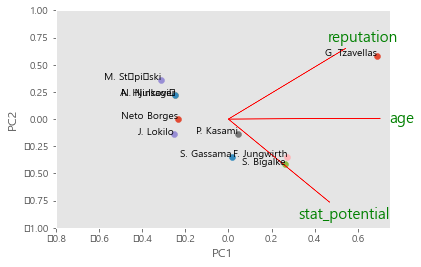

In [490]:
def biplot2(score, coeff, label, pcax, pcay, labels = None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    for i in range(len(xs)):
        plt.scatter(xs[i]*scalex, ys[i]*scaley)
        plt.annotate(label.iloc[i], xy=(xs[i]*scalex, ys[i]*scaley), ha='right')
        
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2], color='r', alpha=1)
        if labels is None:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, "Var"+str(i+1), color='g', ha = 'center', va='center')
        else:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, labels[i], color='g', ha='center', va='center', size=15)
    plt.xlim(-0.8, 0.75)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    
    
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
biplot2(X_pca_soccer, pca_soccer.components_, soccer_name, 1,2,labels=soccer_values.columns)